In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

In [2]:
from model import Model
from feature_normalization import feature_normalize, convert_values

In [3]:
data = pd.read_csv("./datasets/ex1data1.csv")
# data review
data.head(5)

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
X = data[["x"]].to_numpy()
y = data[["y"]].to_numpy()

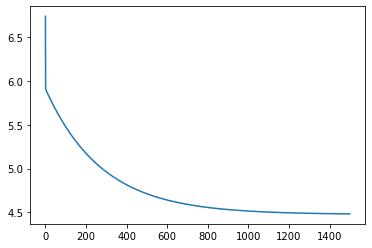

In [5]:
m = Model(X, y)

J_history = m.gradient_descent(iterations=1500, learning_rate=0.01)
plt.plot(J_history)
plt.show()

In [6]:
theta0_vals = np.arange(-10, 10, 0.1)
theta1_vals = np.arange(-1, 4, 0.1)

x_axis, y_axis = np.meshgrid(theta0_vals, theta1_vals)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta = np.array([[theta0], [theta1]])
        J_vals[i][j] = m.cost_function(theta)

J_vals = J_vals.T

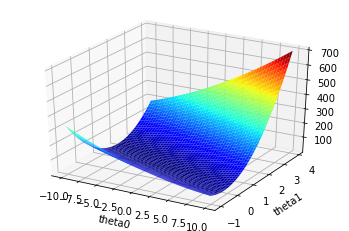

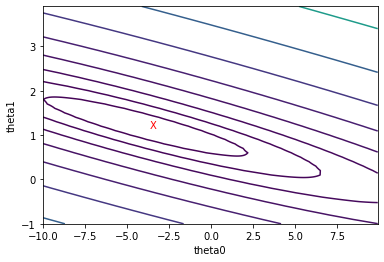

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x_axis, y_axis, J_vals, cmap=cm.jet)
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
plt.show()

plt.contour(x_axis, y_axis, J_vals, np.logspace(-2, 3, 20))
plt.xlabel("theta0")
plt.ylabel("theta1")
plt.annotate("X", (m.theta[0][0], m.theta[1][0]), color='red')
plt.show()

In [8]:
print(m.hypothesis([[3.5]]) * 10000)
print(m.hypothesis([[7]]) * 10000)

[[4519.7678677]]
[[45342.45012945]]


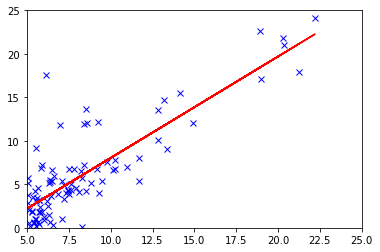

In [9]:
plt.plot(X, y, 'bx', X, m.hypothesis(X), 'r-')
plt.axis([5, 25, 0, 25])
plt.show()

In [10]:
data = pd.read_csv("./datasets/ex1data2.csv")
# data review
data.head(5)

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
X = data[["x1", "x2"]].to_numpy()
y = data[["y"]].to_numpy()

In [12]:
X_n, mu, sigma = feature_normalize(X)

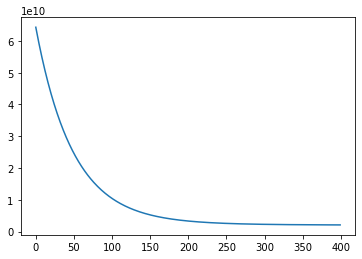

In [13]:
m = Model(X_n, y)
J_history = m.gradient_descent(iterations=400)
plt.plot(J_history)
plt.show()

In [14]:
print(m.theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [15]:
print(m.hypothesis(convert_values([[1800, 3]], mu, sigma)))

[[308188.30869399]]


In [16]:
X = 3 + 2 * np.random.randn(100,1)
y = np.square(X) - np.log(X ** 2) + np.random.randn(100,1)

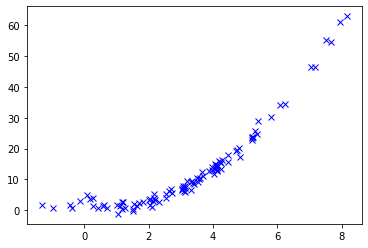

In [17]:
plt.plot(X, y, 'bx')
plt.show()

In [18]:
X = np.c_[X, X ** 2]
X_norm, mu, sigma = feature_normalize(X)

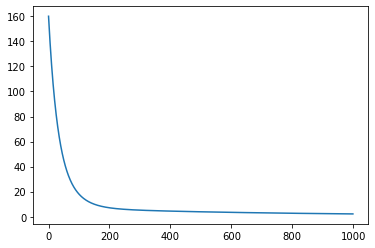

In [19]:
m = Model(X_norm, y)
J_history = m.reg_gradient_descent(1000)
plt.plot(J_history)
plt.show()

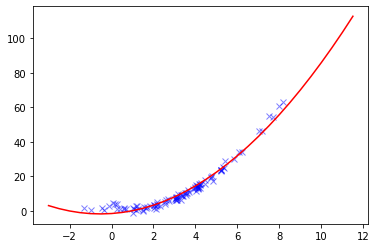

In [20]:
plt.plot(X[:,0], y, 'bx', alpha=0.5)

x_axis = np.arange(-3, 12, 0.5)
x_vals = np.c_[x_axis, x_axis ** 2]
plt.plot(x_axis, m.hypothesis(convert_values(x_vals, mu, sigma)), 'r-')
plt.show()